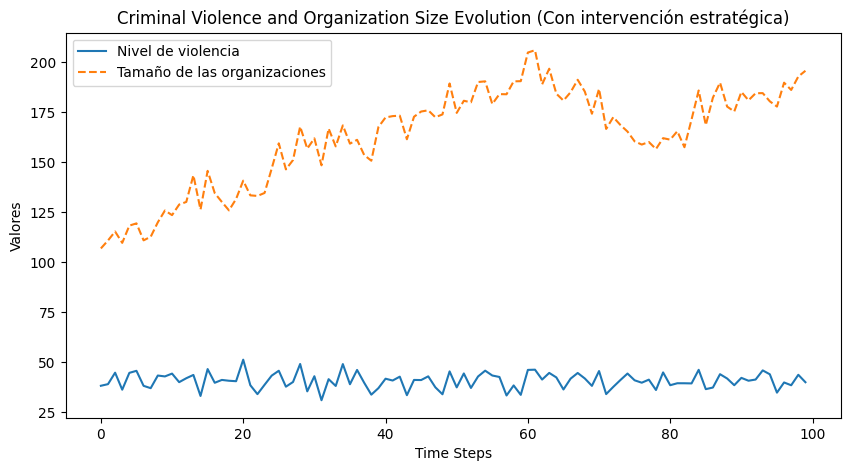

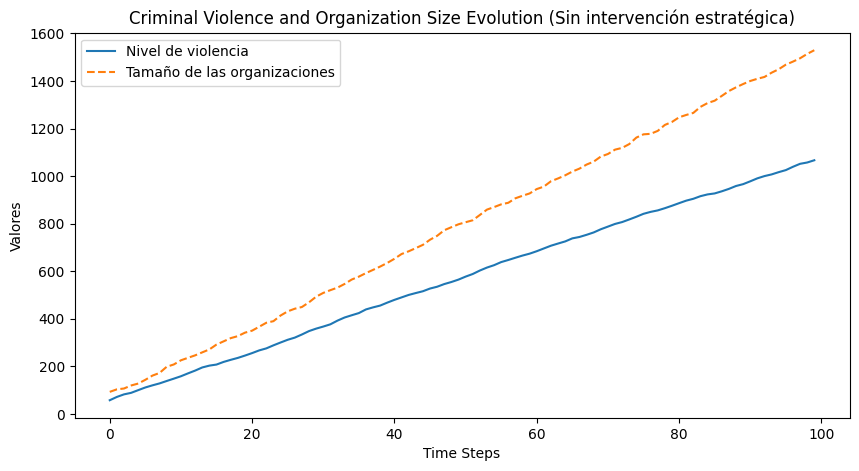

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random

class CriminalGroup:
    """Representa un grupo criminal con fuerza y agresividad, incorporando ruido aleatorio."""

    def __init__(self, unique_id, selective_dismantling):
        self.unique_id = unique_id
        self.strength = np.random.randint(5, 20) + np.random.normal(0, 3)  # Ruido inicial en fuerza
        self.aggression = np.random.randint(1, 10) + np.random.normal(0, 2)  # Ruido inicial en agresividad
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Define el comportamiento del grupo en cada paso con ruido adicional."""
        noise_strength = np.random.normal(0, 2)  # Ruido en fuerza
        noise_aggression = np.random.normal(0, 1.5)  # Ruido en agresividad

        if self.selective_dismantling and self.aggression > 5:
            self.strength *= max(0.8 + noise_strength / 20, 0.5)
            self.aggression *= max(0.5 + noise_aggression / 10, 0.2)
        else:
            self.strength += max(1 + noise_strength, 0)
            self.aggression += max(1 + noise_aggression / 2, 0)

class CrimeModel:
    """Simula la competencia criminal con intervención estratégica opcional y ruido aleatorio."""

    def __init__(self, num_groups, selective_dismantling):
        self.agents = [CriminalGroup(i, selective_dismantling) for i in range(num_groups)]
        self.violence_levels = []
        self.organization_sizes = []  # Nuevo: almacenamiento del tamaño total de los grupos
        self.selective_dismantling = selective_dismantling

    def step(self):
        """Ejecuta un paso de simulación con activación aleatoria y ruido en el orden."""
        random.shuffle(self.agents)  # Activa agentes aleatoriamente
        for agent in self.agents:
            agent.step()

        # Guardamos el nivel de violencia y el tamaño total de las organizaciones
        self.violence_levels.append(sum(agent.aggression for agent in self.agents))
        self.organization_sizes.append(sum(agent.strength for agent in self.agents))  # Nuevo

def run_simulation(steps, num_groups, selective_dismantling):
    """Ejecuta la simulación y grafica la evolución del crimen y tamaño de organizaciones."""
    model = CrimeModel(num_groups, selective_dismantling)

    for _ in range(steps):
        model.step()

    label = "Con intervención estratégica" if selective_dismantling else "Sin intervención estratégica"

    # Graficamos la evolución de violencia y tamaño de organizaciones
    plt.figure(figsize=(10, 5))
    plt.plot(model.violence_levels, label="Nivel de violencia")
    plt.plot(model.organization_sizes, label="Tamaño de las organizaciones", linestyle="dashed")

    plt.xlabel("Time Steps")
    plt.ylabel("Valores")
    plt.title(f"Criminal Violence and Organization Size Evolution ({label})")
    plt.legend()
    plt.show()

# Ejecutar simulación con y sin intervención
run_simulation(100, 10, True)  # Con intervención estratégica
run_simulation(100, 10, False) # Sin intervención estratégica